In [ ]:
import tensorflow as tf
from tensorflow.keras import layers,models
keras = tf.keras

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import glob
import joblib
import datetime

In [ ]:
y= []
X = []

def load_data(path,label):
    files = glob.glob(path+"*.png")
    for myFile in files:
        image = cv2.imread (myFile,0)
        image = cv2.resize(image, (80, 80))
        X.append(image)
        y.append(label)

In [ ]:
open_path = "Dataset/Open_eye/"
load_data(open_path,0)
closed_path = "Dataset/Closed_eye/"
load_data(closed_path,1)

In [ ]:
X_data = np.asarray(X)
y_data = np.array(y)
print(X_data.shape)
print(y_data.shape)

(12658, 80, 80)
(12658,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_data,y_data,random_state=42,test_size=0.25)

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(80, 80)),  # input layer (1)
    keras.layers.Dense(160, activation='relu'),  # hidden layer (2)
    keras.layers.Dense(1, activation='sigmoid') # output layer (3)
])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
begin = datetime.datetime.now()
model.fit(X_train, y_train, epochs=10)
end = datetime.datetime.now()
exe_time = end - begin

Epoch 1/10
297/297 [==============================] - 5s 9ms/step - loss: 13.6893 - accuracy: 0.9176A: 0s - loss: 14.0091 - accuracy: 0
Epoch 2/10
297/297 [==============================] - 3s 9ms/step - loss: 7.5237 - accuracy: 0.9457
Epoch 3/10
297/297 [==============================] - 3s 8ms/step - loss: 4.8582 - accuracy: 0.9628
Epoch 4/10
297/297 [==============================] - 3s 9ms/step - loss: 2.6686 - accuracy: 0.9749
Epoch 5/10
297/297 [==============================] - 3s 9ms/step - loss: 1.4629 - accuracy: 0.9782
Epoch 6/10
297/297 [==============================] - 3s 9ms/step - loss: 0.7080 - accuracy: 0.9868
Epoch 7/10
297/297 [==============================] - 3s 9ms/step - loss: 1.0504 - accuracy: 0.9777
Epoch 8/10
297/297 [==============================] - 3s 8ms/step - loss: 1.4160 - accuracy: 0.9723
Epoch 9/10
297/297 [==============================] - 3s 9ms/step - loss: 0.7462 - accuracy: 0.9757
Epoch 10/10
297/297 [==============================] - 3s 9ms/st

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1) 
print('Accuracy:',test_acc)
print("Execution Time: ",exe_time)

99/99 [==============================] - 1s 3ms/step - loss: 0.0338 - accuracy: 0.9956
Accuracy: 0.9955766201019287
Execution Time:  0:00:30.512271


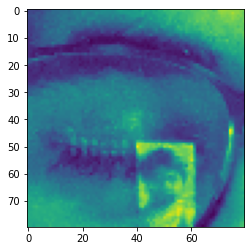

In [ ]:
_ = X_test[555]
plt.imshow(_)
plt.show()

In [ ]:
score = model.predict_classes([X_test[555].reshape(1,6400)])
print(score)

C:\Users\Nishant Kumar\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[[1]]


In [ ]:
print(y_test[0])
print(y_test.shape)

0
(3165,)


In [ ]:
from sklearn.metrics import accuracy_score
pred = model.predict_classes(X_test)
accuracy = accuracy_score(y_test, pred)
accuracy

0.9955766192733018

# For Model Preparation

In [ ]:
final_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(80, 80)),  # input layer (1)
    keras.layers.Dense(160, activation='relu'),  # hidden layer (2)
    keras.layers.Dense(1, activation='sigmoid') # output layer (3)
])
final_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
final_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 6400)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 160)               1024160   
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 161       
Total params: 1,024,321
Trainable params: 1,024,321
Non-trainable params: 0
_________________________________________________________________


In [ ]:
final_model.fit(X_data, y_data, epochs=10)

Epoch 1/10
396/396 [==============================] - 4s 9ms/step - loss: 9.7644 - accuracy: 0.9027TA: 
Epoch 2/10
396/396 [==============================] - 4s 10ms/step - loss: 0.2891 - accuracy: 0.9743
Epoch 3/10
396/396 [==============================] - 4s 10ms/step - loss: 0.2955 - accuracy: 0.9767
Epoch 4/10
396/396 [==============================] - 4s 10ms/step - loss: 0.3129 - accuracy: 0.9750
Epoch 5/10
396/396 [==============================] - 4s 11ms/step - loss: 0.2070 - accuracy: 0.9791
Epoch 6/10
396/396 [==============================] - 4s 10ms/step - loss: 0.0975 - accuracy: 0.9851
Epoch 7/10
396/396 [==============================] - 4s 9ms/step - loss: 0.1742 - accuracy: 0.9837
Epoch 8/10
396/396 [==============================] - 4s 9ms/step - loss: 0.1023 - accuracy: 0.9876
Epoch 9/10
396/396 [==============================] - 4s 9ms/step - loss: 0.0512 - accuracy: 0.9848
Epoch 10/10
396/396 [==============================] - 4s 9ms/step - loss: 0.0385 - accurac

In [ ]:
import cv2
import numpy as np
import joblib
from pygame import mixer

#For sound
mixer.init()
sound = mixer.Sound('beep.wav')


# classifier = joblib.load('final_logreg.gzip')
face_cascade = cv2.CascadeClassifier('haar cascade files/haarcascade_frontalface_alt.xml')
leye_cascade = cv2.CascadeClassifier('haar cascade files/haarcascade_lefteye_2splits.xml')
reye_cascade = cv2.CascadeClassifier('haar cascade files/haarcascade_righteye_2splits.xml')
font = cv2.FONT_HERSHEY_SIMPLEX

cap = cv2.VideoCapture(0)

count = 0
a=0
b=0
score=0
while True:
    if count == 0:
        img = cv2.imread("Prashant.jpeg")
    ret, img = cap.read()
    if ret == False:
        break
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.bilateralFilter(gray,5,1,1)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        cv2.rectangle(img, (x,y), (x+w, y+h), (255, 0, 0), 2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        leyes = leye_cascade.detectMultiScale(roi_gray, 1.3, 5)
        for (ex, ey, ew, eh) in leyes:
            cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2)
            crop_leye = roi_gray[ey:ey+eh, ex:ex+ew]
            crop_leye = cv2.resize(crop_leye,(80, 80), interpolation = cv2.INTER_CUBIC)
        reyes = reye_cascade.detectMultiScale(roi_gray, 1.3, 5)
        for (ex, ey, ew, eh) in reyes:
            cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2)
            crop_reye = roi_gray[ey:ey+eh, ex:ex+ew]
            crop_reye = cv2.resize(crop_reye,(80, 80), interpolation = cv2.INTER_CUBIC)
    
    

    if(count%7 == 0):
        
        a =  final_model.predict_classes([crop_leye.reshape(1,80*80)])
        b =  final_model.predict_classes([crop_reye.reshape(1,80*80)])

#         print(a,b)
        
        if a == 0:
            a = -1
        if b == 0:
            b = -1
        
        if ((a==-1 or b==-1) and score<=0):
            score=0
        elif ((a==-1 or b==-1) and score>=3):
            score += (a+b)/4
        elif ((a==-1 or b==-1) and score<3):
            score += (a+b)/3
        else:
            score += (a+b)/2
        if (score>=10):
            score = 10

    tex1 = 'Score: '+ str(int(score))    
    cv2.putText(img,tex1,(10,25), font,1,(255,255,255),1,cv2.LINE_AA)
    if(score>=5):
        cv2.putText(img,"Drowsy Alert!!!",(200,55),font,1,(0,0,255),2,cv2.LINE_AA)
        if(count%5==0):
            if (not((a==-1 or b==-1) and score<6)):
                try:
                    sound.play()
                except:  # isplaying = False
                    pass
    count += 1
    cv2.imshow("Drowsiness Detection", img)
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break

cap.release()
cv2.destroyAllWindows()

[[0]] [[0]]
[[1]] [[1]]
[[1]] [[1]]
[[1]] [[0]]
[[0]] [[0]]
[[0]] [[0]]
[[0]] [[1]]
[[0]] [[1]]
[[0]] [[1]]
[[0]] [[1]]
[[0]] [[1]]
[[0]] [[1]]
[[1]] [[1]]
[[1]] [[1]]
[[1]] [[1]]
[[1]] [[1]]
[[1]] [[1]]
[[1]] [[1]]
[[1]] [[1]]
[[1]] [[1]]
[[1]] [[1]]
[[0]] [[1]]
[[0]] [[1]]
[[0]] [[0]]
[[1]] [[0]]
[[0]] [[0]]
[[0]] [[0]]
[[0]] [[0]]
[[0]] [[0]]
[[0]] [[0]]
[[0]] [[0]]
[[0]] [[0]]
[[0]] [[0]]
[[0]] [[0]]
[[0]] [[0]]
[[0]] [[0]]
[[1]] [[1]]
[[1]] [[1]]
[[0]] [[1]]
[[0]] [[0]]
[[0]] [[0]]
[[0]] [[0]]
[[0]] [[0]]
[[0]] [[0]]
[[0]] [[0]]
[[0]] [[0]]
[[0]] [[0]]
[[0]] [[0]]
[[0]] [[0]]
[[0]] [[0]]
[[0]] [[0]]
[[0]] [[0]]
[[0]] [[0]]
[[0]] [[0]]
[[0]] [[0]]
[[0]] [[0]]


In [ ]:
final_model.save('DL_model/')

INFO:tensorflow:Assets written to: DL_model/assets


In [ ]:
!apt-get install rar

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  rar
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 295 kB of archives.
After this operation, 799 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/multiverse amd64 rar amd64 2:5.5.0-1 [295 kB]
Fetched 295 kB in 2s (171 kB/s)
Selecting previously unselected package rar.
(Reading database ... 160772 files and directories currently installed.)
Preparing to unpack .../rar_2%3a5.5.0-1_amd64.deb ...
Unpacking rar (2:5.5.0-1) ...
Setting up rar (2:5.5.0-1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [ ]:
!rar a "/content/DL" "/content/DL_model"


RAR 5.50   Copyright (c) 1993-2017 Alexander Roshal   11 Aug 2017
Trial version             Type 'rar -?' for help

Evaluation copy. Please register.

Creating archive /content/DL.rar

Adding    /content/DL_model/saved_model.pb                                 0%  OK 
Adding    /content/DL_model/variables/variables.data-00000-of-00001       34% 68% 99%  OK 
Adding    /content/DL_model/variables/variables.index                     99%  OK 
Adding    /content/DL_model/keras_metadata.pb                             99%  OK 
Adding    /content/DL_model/assets                                         OK 
Adding    /content/DL_model/variables                                      OK 
Adding    /content/DL_model                                                OK 
Done
